In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stads
from statsmodels.stats import stattools


In [5]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self. variableType = ""
        self.low = a
        self.high = b
        
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, size=numberOfSamples)
        return samples

(array([1963., 2076., 1969., 2039., 1953.,    0.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

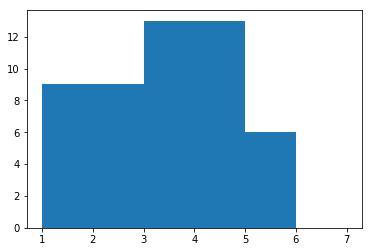

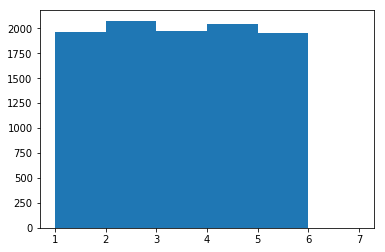

In [26]:
DieRolls = DiscreteRandomVariable(1,6)
_,ax1 = plt.subplots()
_,ax2 = plt.subplots()
ax1.hist(DieRolls.draw(50), bins = [1,2,3,4,5,6,7], align='mid')
ax2.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align='mid')

In [28]:
class BinomialRandomVariable:
    def __init__(self, numberOfTrials=10, probabilityOfSuccess=0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

(array([ 340., 1542., 3059., 3212., 1565.,  282.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

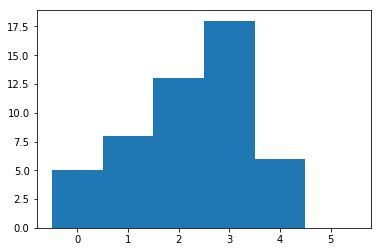

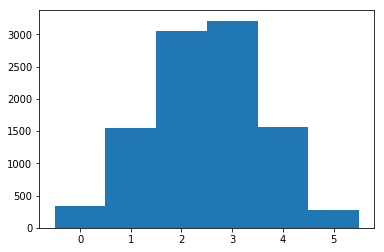

In [44]:
StockProbabilities = BinomialRandomVariable(5, 0.5)
_,ax1 = plt.subplots()
ax1.hist(StockProbabilities.draw(50), bins = [0,1,2,3,4,5,6], align='left')
_,ax2 = plt.subplots()
ax2.hist(StockProbabilities.draw(10000), bins = [0,1,2,3,4,5,6], align='left')

(array([2346., 3908., 2696.,  896.,  146.,    8.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

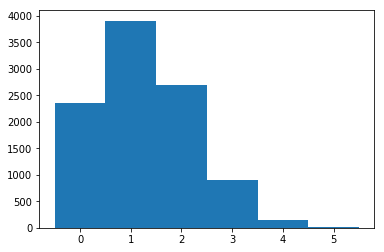

In [45]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
_,ax1 = plt.subplots()
ax1.hist(StockProbabilities.draw(10000), bins = [0,1,2,3,4,5,6], align='left')

In [48]:
class ContinuousRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = 'ContinousRandom'
        self.low = a
        self.high = b
        
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples

(array([1008., 1014.,  991., 1017., 1029.,  997., 1010., 1032.,  918.,
         984.]),
 array([1.09201731e-03, 8.00873042e-01, 1.60065407e+00, 2.40043509e+00,
        3.20021611e+00, 3.99999714e+00, 4.79977816e+00, 5.59955919e+00,
        6.39934021e+00, 7.19912124e+00, 7.99890226e+00]),
 <a list of 10 Patch objects>)

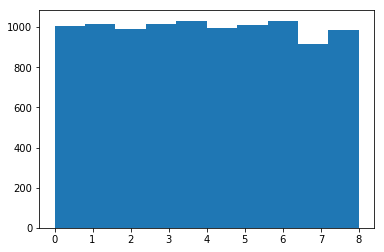

In [53]:
cont = ContinuousRandomVariable(0,8)
plt.hist(cont.draw(10000))

'uniform probability of drawing each infinitesimal point'

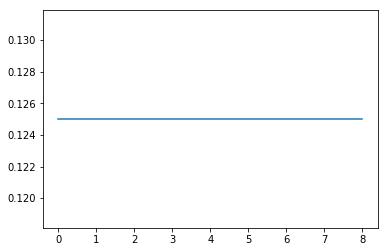

In [55]:
a=0.0
b=8.0
x = np.linspace(a,b,100)
y = [1/(b-a) for i in x]
plt.plot(x,y)
'uniform probability of drawing each infinitesimal point'

In [68]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean=0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = 'Normal'
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        
    def draw(self, numberOfSamples):
        print(self.mean)
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

0


(array([  3.,   1.,   3.,   4.,  16.,  11.,  19.,  28.,  27.,  41.,  60.,
        110., 105., 148., 200., 228., 280., 321., 430., 447., 467., 524.,
        558., 566., 577., 576., 586., 548., 471., 401., 424., 349., 335.,
        263., 210., 180., 117., 119.,  62.,  58.,  41.,  25.,  25.,   9.,
         12.,   5.,   5.,   1.,   2.,   2.]),
 array([-62.42970262, -59.89964451, -57.36958641, -54.83952831,
        -52.30947021, -49.7794121 , -47.249354  , -44.7192959 ,
        -42.1892378 , -39.65917969, -37.12912159, -34.59906349,
        -32.06900538, -29.53894728, -27.00888918, -24.47883108,
        -21.94877297, -19.41871487, -16.88865677, -14.35859867,
        -11.82854056,  -9.29848246,  -6.76842436,  -4.23836626,
         -1.70830815,   0.82174995,   3.35180805,   5.88186616,
          8.41192426,  10.94198236,  13.47204046,  16.00209857,
         18.53215667,  21.06221477,  23.59227287,  26.12233098,
         28.65238908,  31.18244718,  33.71250528,  36.24256339,
         38.772621

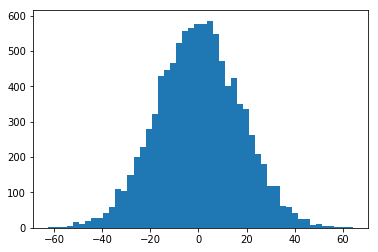

In [72]:
norm = NormalRandomVariable(0, 300)

plt.hist(norm.draw(10000), bins=50)